In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Import Citra

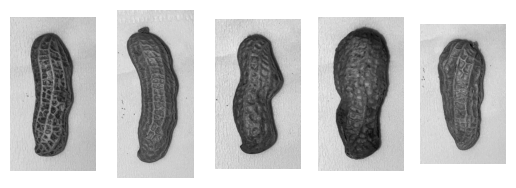

In [12]:
images = []

for num in range(1,6) : 
  filename = "/Users/khodijahanna/Kuliah/Kuliah (Dokumentasi coding)/semester-6/PCD/UAS/DatasetKacang/kacang" + str(num) + ".jpeg"
  img = cv.imread(filename)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  images.append(img)
  
for num in range(len(images)) :
  plt.subplot(2,5,num + 1)
  plt.imshow(images[num], cmap="gray")
  plt.axis(False)
  
    

## Konversi Biner (Domain Spasial)

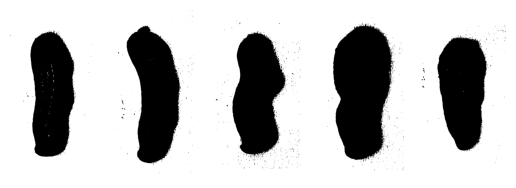

In [13]:
for num in range(len(images)) :
  threshold = 165
  img = images[num]
  img[img < threshold] = 0
  img[img >= threshold] = 255
  plt.subplot(2,5,num + 1)
  plt.imshow(images[num], cmap="gray")  
  plt.axis(False)
    

## Sobel (Domail Spasial Neighborhood)

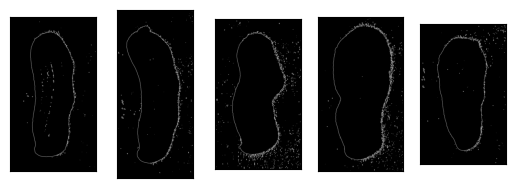

In [14]:
images_copy = images.copy()

# Menampilkan hasil 10 citra
for num,image in enumerate(images_copy):
    image = images_copy[num]
    # Sobel
    Sx = np.array([
                    [-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]
                ])
    Sy = np.array([
                    [1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]
                ])
    

    gradienx = cv.filter2D(image, 6, Sx)
    gradieny = cv.filter2D(image, 6, Sy)
    M = np.sqrt(gradienx**2 + gradieny**2) 

    # Menampilkan citra dan hasil Sobel
    plt.subplot(2, 5, num+1)
    plt.imshow(M, cmap='gray')
    plt.xticks([]), plt.yticks([])

## Morfologi Tepi

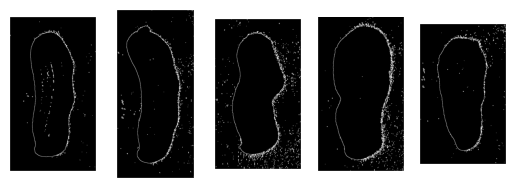

In [26]:
''' Langkah-langkah morfologi untuk mendeteksi tepi
1. RGB to grayscale
2. Grayscale to biner (Ini memudahkan saat roses dilasi erosi)
3. Dilasi: Ditandain kalau minimal ada 1 yang match
4. Erosi: Ditandain kalau all match
5. Tepi: Hasil Dilasi - Erosi '''

# Buat kernel
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]], dtype=np.uint8)

def dilasi(image, kernel):
    dilated_image = np.zeros_like(image)
    height, width = image.shape

    kernel_height, kernel_width = kernel.shape
    kernel_radius_h = kernel_height // 2
    kernel_radius_w = kernel_width // 2

    for i in range(kernel_radius_h, height - kernel_radius_h):
        for j in range(kernel_radius_w, width - kernel_radius_w):
            if image[i, j] == 255:
                dilated_image[i-kernel_radius_h:i+kernel_radius_h+1, j-kernel_radius_w:j+kernel_radius_w+1] = 255
    
    return dilated_image

def erosi(image, kernel):
    eroded_image = np.zeros_like(image)
    height, width = image.shape
    
    kernel_height, kernel_width = kernel.shape
    kernel_radius_h = kernel_height // 2
    kernel_radius_w = kernel_width // 2

    for i in range(kernel_radius_h, height - kernel_radius_h):
        for j in range(kernel_radius_w, width - kernel_radius_w):
            if np.all(image[i-kernel_radius_h:i+kernel_radius_h+1, j-kernel_radius_w:j+kernel_radius_w+1] == 255):
                eroded_image[i, j] = 255
    
    return eroded_image

def deteksi_tepi(image, kernel):
    # Operasi dilasi, erosi, kemudian hasilnya untuk menemukan tepi citra
    dilated_image = dilasi(image, kernel)
    eroded_image = erosi(image, kernel)
    edge_image = dilated_image - eroded_image

    return edge_image

for num in range(len(images)) :
    edge_image = deteksi_tepi(images[num], kernel)
    # dilated_image = dilasi(images[num], kernel)
    # eroded_image = erosi(images[num], kernel)
    # edge_image = dilated_image - eroded_image
    plt.subplot(2,5,num + 1)
    plt.imshow(edge_image, cmap="gray")
    plt.axis(False)

## Deteksi tepi image sederhana

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
                  [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Buat kernel
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]], dtype=np.uint8)

def dilasi(Image, kernel):
    dilated_image = np.zeros_like(Image)
    height, width = Image.shape
    k_height, k_width = kernel.shape
    k_center_y, k_center_x = k_height // 2, k_width // 2

    for y in range(height):
        for x in range(width):
            if Image[y, x] > 0:
                for ky in range(k_height):
                    for kx in range(k_width):
                        if kernel[ky, kx] > 0:
                            ny = y + ky - k_center_y
                            nx = x + kx - k_center_x
                            if ny >= 0 and ny <= height and nx >= 0 and nx <= width:
                                dilated_image[ny, nx] = 255
    return dilated_image

def erosi(Image, kernel):
    eroded_image = np.zeros_like(Image)
    height, width = Image.shape
    k_height, k_width = kernel.shape
    k_center_y, k_center_x = k_height // 2, k_width // 2

    for y in range(height):
        for x in range(width):
            all_match = True
            for ky in range(k_height):
                for kx in range(k_width):
                    if kernel[ky, kx] > 0:
                        ny = y + ky - k_center_y
                        nx = x + kx - k_center_x
                        if ny >= 0 and ny < height and nx >= 0 and nx < width:
                            if Image[ny, nx] == 0:
                                all_match = False
                                break
                        else:
                            all_match = False
                            break
            if all_match:
                eroded_image[y, x] = 255
    return eroded_image

def deteksi_tepi(image, kernel):
    # Operasi dilasi, erosi, kemudian hasilnya untuk menemukan tepi citra
    dilated_image = dilasi(image, kernel)
    eroded_image = erosi(image, kernel)
    edge_image = dilated_image - eroded_image
    return edge_image

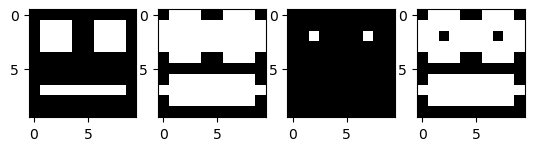

In [6]:
dilated_image = dilasi(image, kernel)
eroded_image = erosi(image, kernel)
edge_image = dilated_image - eroded_image

plt.subplot(1,4,1)
plt.imshow(image, cmap="gray")

plt.subplot(1,4,2)
plt.imshow(dilated_image, cmap="gray")

plt.subplot(1,4,3)
plt.imshow(eroded_image, cmap="gray")

plt.subplot(1,4,4)
plt.imshow(edge_image, cmap="gray")